# Transportation Analysis 
In this project, I’m exploring transportation data from the Bureau of Transportation Statistics (BTS) to find insights about how people and goods move across the U.S., and where improvements can be made in safety, efficiency, and environmental impact.

Because the dataset is quite large, I’ll be analyzing it year by year and comparing the results across different years. To start, I’m focusing on the data for 2020, digging into that year’s trends and patterns before moving on to others.

This approach helps keep the analysis manageable and lets us clearly see how transportation dynamics change over time.

In [ ]:
import os
import pandas as pd
import gc

In [58]:
os.makedirs("cleaned", exist_ok=True)

In [2]:
main_folder = "2020 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2020 = pd.concat(all_data, ignore_index=True)


C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2553800348.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2553800348.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2553800348.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2553800348.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2553800348.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\App

In [3]:
Data_2020.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020,NaN
1,1,AK,901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020,NaN
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020,NaN
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020,NaN
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020,NaN


## Data Understanding & Preprocessing

### 1. Data Overview
- Brief description of the dataset (source, purpose, size, number of features, and observations)
- Types of variables (numerical, categorical, datetime, etc.)
- Initial observations about the data (e.g., imbalance, missing data, outliers)

### 2. Data Quality Checks
- Check for missing values and filling or dropping them. 
- dropping columns.
- checking for unique values

In [4]:
Data_2020.shape

(6104767, 15)

In [5]:
Data_2020.isnull().mean().sort_values(ascending=False)

MEXSTATE           0.725568
DEPE               0.625567
CANPROV            0.476271
DF                 0.338619
COMMODITY2         0.228308
USASTATE           0.146125
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
MONTH              0.000000
YEAR               0.000000
dtype: float64

In [6]:
Data_2020_1 = Data_2020.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [7]:
Data_2020_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,5,1220,4660,0,67,2.0,X,4,2020,NaN
1,1,AK,5,1220,14360,0,282,1.0,X,4,2020,NaN
2,1,AK,1,2010,4293733,24971000,0,1.0,0,4,2020,NaN
3,1,AK,3,1220,28283,443,563,1.0,X,4,2020,NaN
4,1,AK,3,1220,29848,69,538,2.0,X,4,2020,NaN


In [8]:
Data_2020_1.isnull().mean().sort_values(ascending=False)

DF                 0.338619
COMMODITY2         0.228308
USASTATE           0.146125
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
MONTH              0.000000
YEAR               0.000000
dtype: float64

In [9]:
Data_2020_1["DF"] = Data_2020_1["DF"].fillna(method="ffill")


C:\Users\Law\AppData\Local\Temp\ipykernel_3268\4269140452.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2020_1["DF"] = Data_2020_1["DF"].fillna(method="ffill")


In [10]:
Data_2020_cleaned = Data_2020_1.dropna()

In [11]:
Data_2020_cleaned.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
128479,1,AK,5,2010,22370,0,0,1.0,0,4,2020,2.0
128480,1,AK,1,1220,108133,24698,1482,1.0,X,4,2020,3.0
128481,1,AK,1,1220,809104,99790,15864,1.0,X,4,2020,3.0
128482,1,AK,5,1220,887888,0,17546,1.0,X,4,2020,3.0
128483,1,AK,5,1220,76006,0,1665,1.0,X,4,2020,3.0


In [12]:
Data_2020_cleaned.shape

(3818938, 12)

In [13]:
Data_2020_cleaned.isnull().sum().sum()

0

In [65]:
Data_2020_cleaned["CONTCODE"] = Data_2020_cleaned["CONTCODE"].astype("string")
Data_2020_cleaned.to_parquet("cleaned/2020.parquet", engine = "pyarrow", compression = "snappy")
del Data_2020_cleaned; gc.collect()

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2631467227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2020_cleaned["CONTCODE"] = Data_2020_cleaned["CONTCODE"].astype("string")


2066

In [14]:
main_folder = "2021 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2021 = pd.concat(all_data, ignore_index=True)

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2280614508.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2280614508.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2280614508.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2280614508.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2280614508.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\

In [15]:
Data_2021.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,07XX,3,NaN,XO,1220,13504,47,401,1.0,X,4.0,2021,NaN
1,1,AK,18XX,1,XX,NaN,2010,6668,425,0,1.0,1,4.0,2021,NaN
2,1,AK,20XX,3,NaN,XA,1220,5108,584,80,1.0,X,4.0,2021,NaN
3,1,AK,20XX,3,NaN,XC,1220,24397,800,1002,1.0,X,4.0,2021,NaN
4,1,AK,20XX,3,NaN,XC,1220,18429,101,80,2.0,X,4.0,2021,NaN


In [16]:
Data_2021.shape

(10982798, 15)

In [17]:
Data_2021.isnull().mean().sort_values(ascending=False)

MEXSTATE           0.719968
DEPE               0.627705
CANPROV            0.480113
DF                 0.336806
COMMODITY2         0.227933
USASTATE           0.144362
MONTH              0.022289
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
YEAR               0.000000
dtype: float64

In [18]:
Data_2021_1 = Data_2021.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [19]:
Data_2021_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,3,1220,13504,47,401,1.0,X,4.0,2021,NaN
1,1,AK,1,2010,6668,425,0,1.0,1,4.0,2021,NaN
2,1,AK,3,1220,5108,584,80,1.0,X,4.0,2021,NaN
3,1,AK,3,1220,24397,800,1002,1.0,X,4.0,2021,NaN
4,1,AK,3,1220,18429,101,80,2.0,X,4.0,2021,NaN


In [20]:
Data_2021_1.shape

(10982798, 12)

In [21]:
Data_2021_1["DF"] = Data_2021_1["DF"].fillna(method="ffill")

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\3661673831.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2021_1["DF"] = Data_2021_1["DF"].fillna(method="ffill")


In [22]:
Data_2021_cleaned = Data_2021_1.dropna()

In [23]:
Data_2021_cleaned.shape

(6741826, 12)

In [24]:
Data_2021_cleaned.isnull().sum()

TRDTYPE            0
USASTATE           0
DISAGMOT           0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
dtype: int64

In [66]:
Data_2021_cleaned["CONTCODE"] = Data_2021_cleaned["CONTCODE"].astype("string")
Data_2021_cleaned.to_parquet("cleaned/2021.parquet", engine = "pyarrow", compression = "snappy")
del Data_2021_cleaned; gc.collect()

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\1936827129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2021_cleaned["CONTCODE"] = Data_2021_cleaned["CONTCODE"].astype("string")


0

In [25]:
main_folder = "2022 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2022 = pd.concat(all_data, ignore_index=True)

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\921325311.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\921325311.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\921325311.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\921325311.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\921325311.py:11: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppDat

In [26]:
Data_2022.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,09XX,3,NaN,XC,1220,7091,36,644,1.0,X,4.0,2022.0,NaN
1,1,AK,19XX,1,XX,NaN,2010,39775,33470,0,1.0,0,4.0,2022.0,NaN
2,1,AK,20XX,3,NaN,XA,1220,11775,425,438,1.0,X,4.0,2022.0,NaN
3,1,AK,20XX,3,NaN,XA,1220,11103,17,37,2.0,X,4.0,2022.0,NaN
4,1,AK,20XX,3,NaN,XC,1220,45731,550,3548,1.0,X,4.0,2022.0,NaN


In [27]:
Data_2022.shape

(11275950, 15)

In [28]:
Data_2022.isnull().mean().sort_values(ascending=False)

MEXSTATE           7.233022e-01
DEPE               6.271934e-01
CANPROV            4.752699e-01
DF                 3.354754e-01
COMMODITY2         2.301897e-01
USASTATE           1.426170e-01
MONTH              2.233657e-02
YEAR               8.868432e-08
TRDTYPE            0.000000e+00
DISAGMOT           0.000000e+00
COUNTRY            0.000000e+00
VALUE              0.000000e+00
SHIPWT             0.000000e+00
FREIGHT_CHARGES    0.000000e+00
CONTCODE           0.000000e+00
dtype: float64

In [29]:
Data_2022_1 = Data_2022.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [30]:
Data_2022_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,3,1220,7091,36,644,1.0,X,4.0,2022.0,NaN
1,1,AK,1,2010,39775,33470,0,1.0,0,4.0,2022.0,NaN
2,1,AK,3,1220,11775,425,438,1.0,X,4.0,2022.0,NaN
3,1,AK,3,1220,11103,17,37,2.0,X,4.0,2022.0,NaN
4,1,AK,3,1220,45731,550,3548,1.0,X,4.0,2022.0,NaN


In [31]:
Data_2022_1.shape

(11275950, 12)

In [32]:
Data_2022_1["DF"] = Data_2022_1["DF"].fillna(method="ffill")

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\2423709285.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2022_1["DF"] = Data_2022_1["DF"].fillna(method="ffill")


In [33]:
Data_2022_cleaned = Data_2022_1.dropna()

In [34]:
Data_2022_cleaned.shape

(6916002, 12)

In [67]:
Data_2022_cleaned["CONTCODE"] = Data_2022_cleaned["CONTCODE"].astype("string")
Data_2022_cleaned.to_parquet("cleaned/2022.parquet", engine = "pyarrow", compression = "snappy")
del Data_2022_cleaned; gc.collect()

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\8290740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2022_cleaned["CONTCODE"] = Data_2022_cleaned["CONTCODE"].astype("string")


0

In [35]:
main_folder = "2023 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2023 = pd.concat(all_data, ignore_index=True)

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\536437812.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\536437812.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\536437812.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\536437812.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\536437812.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppDa

In [36]:
Data_2023.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0708,5,NaN,XQ,1220,21046,0,412,2.0,X,4,2023,NaN
1,1,AK,07XX,3,NaN,XO,1220,185454,310,3337,1.0,X,4,2023,NaN
2,1,AK,09XX,3,NaN,XQ,1220,21660,51,226,1.0,X,4,2023,NaN
3,1,AK,2006,3,NaN,XQ,1220,5053,5,99,2.0,X,4,2023,NaN
4,1,AK,20XX,3,NaN,XA,1220,51328,675,1271,1.0,X,4,2023,NaN


In [37]:
Data_2023.shape

(5919169, 15)

In [38]:
Data_2023.isnull().mean().sort_values(ascending=False)

MEXSTATE           0.716462
DEPE               0.628549
CANPROV            0.480501
DF                 0.333755
COMMODITY2         0.229952
USASTATE           0.141499
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
MONTH              0.000000
YEAR               0.000000
dtype: float64

In [39]:
Data_2023_1 = Data_2023.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [40]:
Data_2023_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,5,1220,21046,0,412,2.0,X,4,2023,NaN
1,1,AK,3,1220,185454,310,3337,1.0,X,4,2023,NaN
2,1,AK,3,1220,21660,51,226,1.0,X,4,2023,NaN
3,1,AK,3,1220,5053,5,99,2.0,X,4,2023,NaN
4,1,AK,3,1220,51328,675,1271,1.0,X,4,2023,NaN


In [41]:
Data_2023_1.shape

(5919169, 12)

In [42]:
Data_2023_1["DF"] = Data_2022_1["DF"].fillna(method="ffill")

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\3825460211.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2023_1["DF"] = Data_2022_1["DF"].fillna(method="ffill")


In [43]:
Data_2023_cleaned = Data_2023_1.dropna()

In [44]:
Data_2023_cleaned.shape

(3720485, 12)

In [68]:
Data_2023_cleaned["CONTCODE"] = Data_2023_cleaned["CONTCODE"].astype("string")
Data_2023_cleaned.to_parquet("cleaned/2023.parquet", engine = "pyarrow", compression = "snappy")
del Data_2023_cleaned; gc.collect()

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\3686201881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2023_cleaned["CONTCODE"] = Data_2023_cleaned["CONTCODE"].astype("string")


0

In [45]:
main_folder = "2024 Dataset"

all_data = []

for month_folder in os.listdir(main_folder):
    month_path = os.path.join(main_folder, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".csv"):
                file_path = os.path.join(month_path, file)
                df = pd.read_csv(file_path)
                all_data.append(df)

Data_2024 = pd.concat(all_data, ignore_index=True)

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Law\AppData\Local\Temp\ipykernel_3268\1945464335.py:11: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\L

In [46]:
Data_2024.head(5)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0712,5,NaN,XQ,1220,14609,0,286,1.0,X,4,2024,NaN
1,1,AK,0901,5,NaN,XY,1220,26482,0,26,1.0,X,4,2024,NaN
2,1,AK,19XX,1,XX,NaN,2010,72786,40210,0,1.0,0,4,2024,NaN
3,1,AK,20XX,3,NaN,XA,1220,111914,775,980,1.0,X,4,2024,NaN
4,1,AK,20XX,3,NaN,XA,1220,24831,63,178,2.0,X,4,2024,NaN


In [47]:
Data_2024.shape

(1108543, 15)

In [48]:
Data_2024.isnull().mean().sort_values(ascending=False)

MEXSTATE           0.702730
DEPE               0.639076
CANPROV            0.478648
DF                 0.328630
COMMODITY2         0.235537
USASTATE           0.125387
TRDTYPE            0.000000
DISAGMOT           0.000000
COUNTRY            0.000000
VALUE              0.000000
SHIPWT             0.000000
FREIGHT_CHARGES    0.000000
CONTCODE           0.000000
MONTH              0.000000
YEAR               0.000000
dtype: float64

In [49]:
Data_2024_1 = Data_2024.drop(columns=["DEPE", "MEXSTATE", "CANPROV"])

In [50]:
Data_2024_1.head(5)

,TRDTYPE,USASTATE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,5,1220,14609,0,286,1.0,X,4,2024,NaN
1,1,AK,5,1220,26482,0,26,1.0,X,4,2024,NaN
2,1,AK,1,2010,72786,40210,0,1.0,0,4,2024,NaN
3,1,AK,3,1220,111914,775,980,1.0,X,4,2024,NaN
4,1,AK,3,1220,24831,63,178,2.0,X,4,2024,NaN


In [51]:
Data_2024_1.shape

(1108543, 12)

In [52]:
Data_2024_1["DF"] = Data_2024_1["DF"].fillna(method="ffill")

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\1614991751.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_2024_1["DF"] = Data_2024_1["DF"].fillna(method="ffill")


In [53]:
Data_2024_cleaned = Data_2024_1.dropna()

In [54]:
Data_2024_cleaned.shape

(708443, 12)

In [69]:
Data_2024_cleaned["CONTCODE"] = Data_2024_cleaned["CONTCODE"].astype("string")
Data_2024_cleaned.to_parquet("cleaned/2024.parquet", engine="pyarrow", compression="snappy")
del Data_2024_cleaned; gc.collect()

C:\Users\Law\AppData\Local\Temp\ipykernel_3268\1331808624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2024_cleaned["CONTCODE"] = Data_2024_cleaned["CONTCODE"].astype("string")


0

## Combining All My Yearly Datasets
To make the analysis easier and more insightful, I decided to combine all my individual yearly datasets into one master dataset. Instead of working with separate files for each year, this approach let me look at trends over time and run comparisons without jumping between files.

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from tabulate import tabulate
import plotly.express as px

In [73]:
D_Data = dd.read_parquet("cleaned/*.parquet", engine="pyarrow", gather_statistics=False)

In [ ]:
Final_Data = D_Data.repartition(npartitions = 30)


### Data Visualization, Analysis, and Answering Key Questions

1. Which modes of transportation (DISAGMOT) accounted for the highest total shipping weight (SHIPWT) and value (VALUE) from 2020 to 2024?

2. How did trade volume (by VALUE and SHIPWT) vary seasonally across different months (MONTH) and years (YEAR) from 2020 to 2024?

3. Which U.S. states (USASTATE) and countries (COUNTRY) contributed most to the volume and value of trade from 2020 to 2024?

4. What was the distribution of trade types (TRDTYPE) across domestic and foreign shipments (DF) from 2020 to 2024?

5. How did container type (CONTCODE) usage vary by mode of transportation (DISAGMOT) from 2020 to 2024?

6. Were there any trends or changes in trade volume and value by year (YEAR) across different transportation modes (DISAGMOT) from 2020 to 2024?

7. Was there a correlation between shipping weight (SHIPWT), trade value (VALUE), and freight charges (FREIGHT_CHARGES) for different transportation modes (DISAGMOT) from 2020 to 2024?


#### Answering the business Question. 
starting with question number 1.

In [76]:
df_filtered = Final_Data[Final_Data["YEAR"].between(2020, 2024)]

In [ ]:
yearly_summary = df_filtered.groupby(["YEAR", "DISAGMOT"])[["SHIPWT", "VALUE"]].sum().reset_index()

In [89]:
Summary = yearly_summary.compute()

In [81]:
top_shipwt_by_year = Summary.loc[
    Summary.groupby("YEAR")["SHIPWT"].idxmax()
]

In [82]:
top_value_by_year = Summary.loc[
    Summary.groupby("YEAR")["VALUE"].idxmax()
]

In [86]:
top_combined = pd.merge(
    top_shipwt_by_year[["YEAR", "DISAGMOT", "SHIPWT"]].rename(columns={
        "DISAGMOT": "Top SHIPWT Mode",
        "SHIPWT": "Total Shipping Weight"
    }),
    top_value_by_year[["YEAR", "DISAGMOT", "VALUE"]].rename(columns={
        "DISAGMOT": "Top VALUE Mode",
        "VALUE": "Total Trade Value"
    }),
    on="YEAR"
)

In [ ]:
print(tabulate(top_combined, headers='keys', tablefmt='github', showindex=False))

      YEAR  Top SHIPWT Mode  Total Shipping Weight  Top VALUE Mode  \
0   2020.0                3             1391742839               3   
1   2020.0                3             1391742839               1   
2   2020.0                3             1391742839               5   
3   2020.0                1           847907272409               3   
4   2020.0                1           847907272409               1   
5   2020.0                1           847907272409               5   
6   2020.0                5           488795678811               3   
7   2020.0                5           488795678811               1   
8   2020.0                5           488795678811               5   
9   2020.0                9            12403912620               3   
10  2020.0                9            12403912620               1   
11  2020.0                9            12403912620               5   
12  2021.0                1          1409961971291               5   
13  2021.0          

In [88]:
# Check number of max SHIPWT rows per year
duplicates_shipwt = Summary.groupby('YEAR')['SHIPWT'].transform(lambda x: x == x.max())
print(Summary[duplicates_shipwt].groupby('YEAR').size())


YEAR
2020.0    1
2021.0    1
2022.0    1
2023.0    1
2024.0    1
dtype: int64


c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


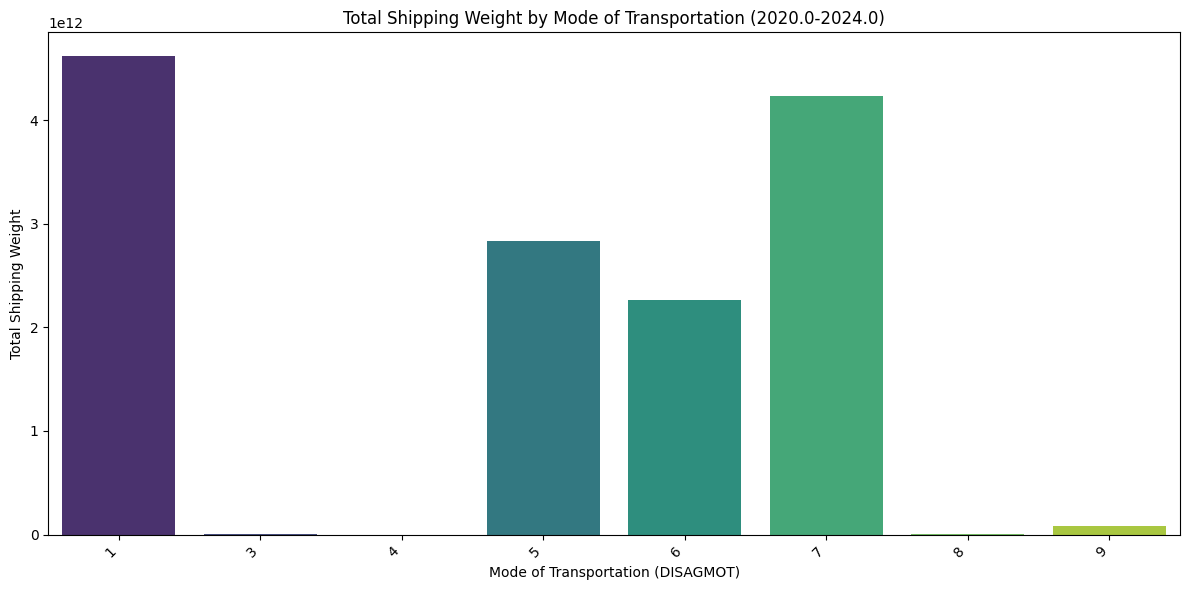

c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


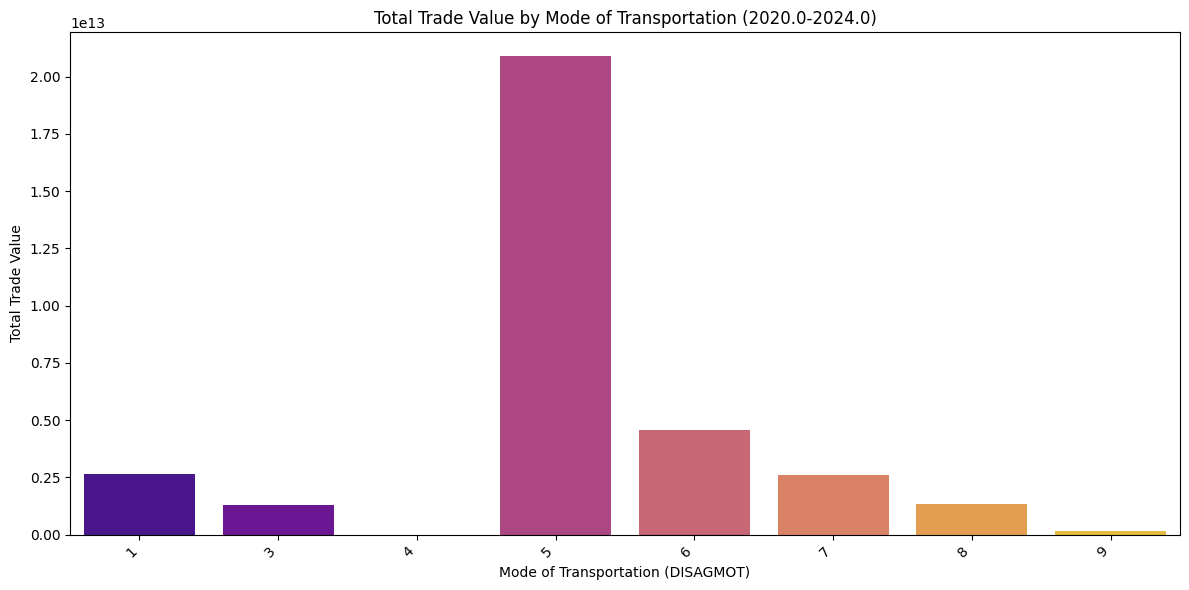

In [ ]:
# Plot for Total Shipping Weight Over the 5 year Period
plt.figure(figsize = (12, 6))
sns.barplot(x = transport_summary_shipwt_multi_year.index, y = "SHIPWT", data = transport_summary_shipwt_multi_year, palette = "viridis")
plt.title(f"Total Shipping Weight by Mode of Transportation ({min_year}-{max_year})")
plt.xlabel("Mode of Transportation (DISAGMOT)")
plt.ylabel("Total Shipping Weight")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.savefig(f"total_shipping_weight_by_mode_combined_{min_year}-{max_year}.png")
plt.show()
plt.close()

# Plot for Total Trade Value Over the 5 year Period
plt.figure(figsize = (12, 6))
sns.barplot(x = transport_summary_value_multi_year.index, y="VALUE", data = transport_summary_value_multi_year, palette = "plasma")
plt.title(f"Total Trade Value by Mode of Transportation ({min_year}-{max_year})")
plt.xlabel("Mode of Transportation (DISAGMOT)")
plt.ylabel("Total Trade Value")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.savefig(f"total_trade_value_by_mode_combined_{min_year}-{max_year}.png")
plt.show()
plt.close()

### Answering Q2 

In [91]:
df_filtered = Final_Data[Final_Data["YEAR"].between(2020, 2024)]

In [92]:
monthly_summary = df_filtered.groupby(["YEAR", "MONTH"])[["SHIPWT", "VALUE"]].sum().reset_index()
monthly_summary = monthly_summary.compute()


In [93]:
pivot_value = monthly_summary.pivot(index="MONTH", columns="YEAR", values="VALUE")
pivot_shipwt = monthly_summary.pivot(index="MONTH", columns="YEAR", values="SHIPWT")

In [101]:
month_order = list(range(1, 13))

fig = px.line(
    monthly_summary,
    x="MONTH",
    y="VALUE",
    color="YEAR",
    title="Seasonal Trade Value Trends (2020–2024)",
    markers=True,
    category_orders={"MONTH": month_order}
)
fig.update_layout(xaxis_title="Month", yaxis_title="Trade Value")
fig.show()

fig2 = px.line(
    monthly_summary,
    x="MONTH",
    y="SHIPWT",
    color="YEAR",
    title="Seasonal Shipping Weight Trends (2020–2024)",
    markers=True,
    category_orders={"MONTH": month_order}
)
fig2.update_layout(xaxis_title="Month", yaxis_title="Shipping Weight")
fig2.show()


### Q3

In [102]:
state_summary = df_filtered.groupby("USASTATE")[["SHIPWT", "VALUE"]].sum().compute()
state_summary = state_summary.sort_values(by=["SHIPWT", "VALUE"], ascending=False)

In [103]:
country_summary = df_filtered.groupby("COUNTRY")[["SHIPWT", "VALUE"]].sum().compute()
country_summary = country_summary.sort_values(by=["SHIPWT", "VALUE"], ascending=False)

In [106]:
top_states = state_summary.head(10).reset_index()
fig_states = px.bar(top_states, x = "USASTATE", y = "SHIPWT", title = "Top 10 U.S. States by Shipping Weight")
fig_states.show()

In [107]:
fig = px.bar(
    country_summary.reset_index(),
    x="COUNTRY",
    y="VALUE",
    title="Trade Value by Country (2020–2024)",
    text_auto=True
)
fig.update_layout(xaxis_title="Country", yaxis_title="Trade Value")
fig.show()


### Q4

In [ ]:
trdtype_df_summary = df_filtered.groupby(["YEAR", "DF", "TRDTYPE"]).size().compute()
trdtype_df_summary = trdtype_df_summary.reset_index()
trdtype_df_summary.columns = ["YEAR", "DF", "TRDTYPE", "COUNT"]

In [114]:
trdtype_df_summary["PERCENT"] = trdtype_df_summary.groupby(["YEAR", "TRDTYPE"])["COUNT"].transform(
    lambda x: x / x.sum() * 100
)

fig = px.bar(
    trdtype_df_summary,
    x="TRDTYPE",
    y="PERCENT",
    color="DF",
    barmode="stack",
    facet_col="YEAR",
    category_orders={"YEAR": sorted(trdtype_df_summary["YEAR"].unique())},
    title="Yearly Percentage Distribution of Trade Types by Domestic/Foreign (2020–2024)",
    labels={"TRDTYPE": "Trade Type", "PERCENT": "Percentage (%)", "DF": "Domestic/Foreign"},
    text_auto=".1f"
)

fig.update_layout(height=500, width=1200)
fig.show()


Q5

In [115]:
container_mode_summary = df_filtered.groupby(["YEAR", "DISAGMOT", "CONTCODE"]).size().compute().reset_index()
container_mode_summary.columns = ["YEAR", "DISAGMOT", "CONTCODE", "COUNT"]

In [116]:
fig = px.bar(
    container_mode_summary,
    x="CONTCODE",
    y="COUNT",
    color="DISAGMOT",
    barmode="group",
    facet_col="YEAR",
    category_orders={"YEAR": sorted(container_mode_summary["YEAR"].unique())},
    title="Container Type Usage by Mode of Transportation (2020–2024)",
    labels={
        "CONTCODE": "Container Type",
        "COUNT": "Number of Shipments",
        "DISAGMOT": "Mode of Transportation",
    },
    height=500,
    width=1200
)

fig.update_layout(
    xaxis={'categoryorder':'category ascending'},
)
fig.show()


In [117]:
contcode_counts = df_filtered["CONTCODE"].value_counts().compute()

In [118]:
print(contcode_counts.head(20))

CONTCODE
X     8053416
1     1383693
0    12468585
Name: count, dtype: int64[pyarrow]


### Q6

In [119]:
yearly_mode_summary = df_filtered.groupby(["YEAR", "DISAGMOT"])[["SHIPWT", "VALUE"]].sum().compute().reset_index()

In [120]:
fig_weight = px.line(
    yearly_mode_summary,
    x="YEAR",
    y="SHIPWT",
    color="DISAGMOT",
    title="Yearly Trade Volume (Shipping Weight) by Transportation Mode (2020–2024)",
    markers=True,
    labels={"SHIPWT": "Total Shipping Weight", "YEAR": "Year", "DISAGMOT": "Transportation Mode"}
)
fig_weight.show()

fig_value = px.line(
    yearly_mode_summary,
    x="YEAR",
    y="VALUE",
    color="DISAGMOT",
    title="Yearly Trade Value by Transportation Mode (2020–2024)",
    markers=True,
    labels={"VALUE": "Total Trade Value", "YEAR": "Year", "DISAGMOT": "Transportation Mode"}
)
fig_value.show()


In [122]:
df_filtered = Final_Data[Final_Data["YEAR"].between(2020, 2024)][["DISAGMOT", "SHIPWT", "VALUE", "FREIGHT_CHARGES"]]
df_filtered = df_filtered.compute()

In [123]:
overall_corr = df_filtered[["SHIPWT", "VALUE", "FREIGHT_CHARGES"]].corr()
print("Overall Correlation Matrix:")
print(overall_corr)

Overall Correlation Matrix:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.592971         0.857956
VALUE            0.592971  1.000000         0.573395
FREIGHT_CHARGES  0.857956  0.573395         1.000000


In [124]:
modes = df_filtered["DISAGMOT"].unique()

for mode in modes:
    mode_df = df_filtered[df_filtered["DISAGMOT"] == mode]
    corr = mode_df[["SHIPWT", "VALUE", "FREIGHT_CHARGES"]].corr()
    print(f"\nCorrelation matrix for DISAGMOT = {mode}:")
    print(corr)


Correlation matrix for DISAGMOT = 5:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.351160         0.438176
VALUE            0.351160  1.000000         0.549945
FREIGHT_CHARGES  0.438176  0.549945         1.000000

Correlation matrix for DISAGMOT = 1:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.890529         0.542283
VALUE            0.890529  1.000000         0.443223
FREIGHT_CHARGES  0.542283  0.443223         1.000000

Correlation matrix for DISAGMOT = 8:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.029731         0.001323
VALUE            0.029731  1.000000         0.476336
FREIGHT_CHARGES  0.001323  0.476336         1.000000

Correlation matrix for DISAGMOT = 3:
                   SHIPWT     VALUE  FREIGHT_CHARGES
SHIPWT           1.000000  0.201923         0.423080
VALUE            0.201923  1.000000         0.383503
FREIGHT_CHARGES  0.423080  0.383503         1.000000


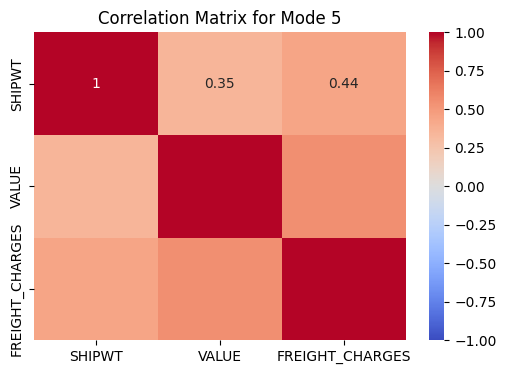

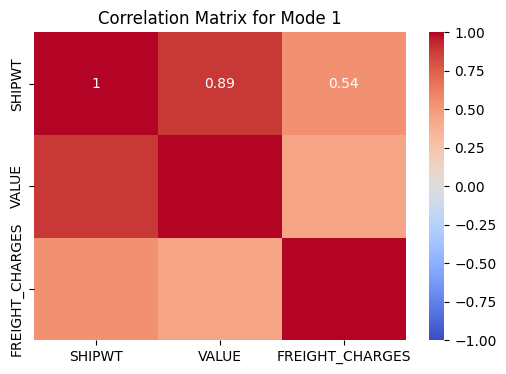

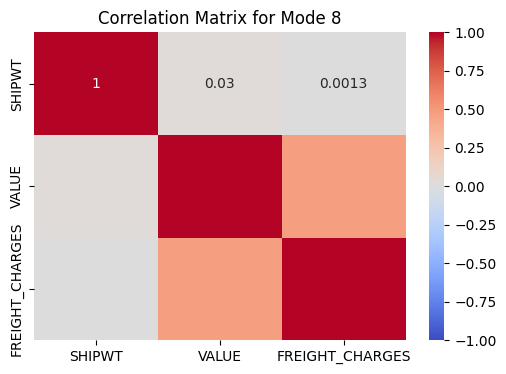

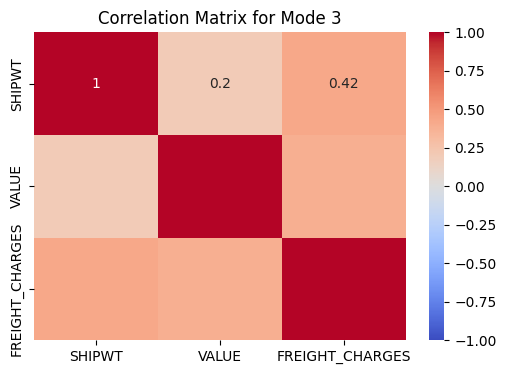

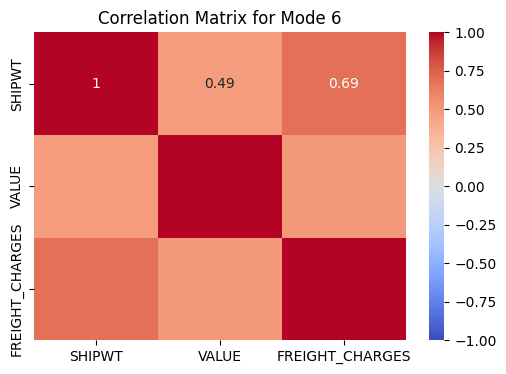

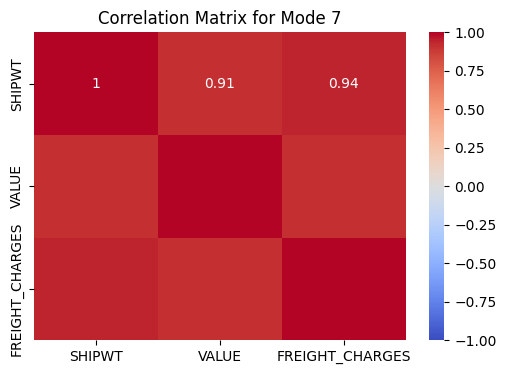

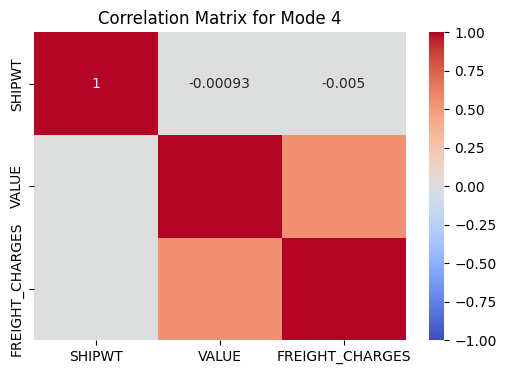

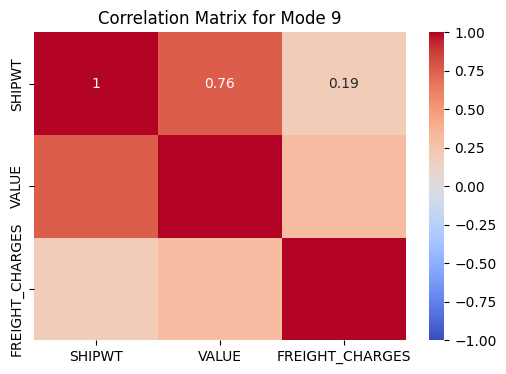

In [125]:
for mode in modes:
    mode_df = df_filtered[df_filtered["DISAGMOT"] == mode]
    corr = mode_df[["SHIPWT", "VALUE", "FREIGHT_CHARGES"]].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix for Mode {mode}")
    plt.show()
